In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('/content/gameandgrade.csv')

In [ ]:
df.head()

,Sex,School Code,Playing Years,Playing Often,Playing Hours,Playing Games,Parent Revenue,Father Education,Mother Education,Grade
0,0,1,1,2,1,1,4,4,5,77.50
1,1,1,1,3,1,1,1,3,3,83.00
2,0,1,0,0,0,0,1,3,3,80.00
3,0,1,3,5,1,1,2,2,3,45.00
4,1,1,1,1,2,1,1,3,4,85.00


In [ ]:
print(df.isnull().sum())

Sex                 0
School Code         0
Playing Years       0
Playing Often       0
Playing Hours       0
Playing Games       0
Parent Revenue      0
Father Education    0
Mother Education    0
Grade               0
dtype: int64


In [ ]:
print(df.describe())

              Sex  School Code  Playing Years  Playing Often  Playing Hours  \
count  770.000000   770.000000     770.000000     770.000000     770.000000   
mean     0.498701     4.944156       1.584416       2.242857       1.488312   
std      0.500323     2.999913       1.407306       1.923635       1.337853   
min      0.000000     1.000000       0.000000       0.000000       0.000000   
25%      0.000000     2.000000       0.000000       0.000000       0.000000   
50%      0.000000     4.000000       1.000000       2.000000       1.000000   
75%      1.000000     8.000000       3.000000       4.000000       2.000000   
max      1.000000    11.000000       4.000000       5.000000       5.000000   

       Playing Games  Parent Revenue  Father Education  Mother Education  
count     770.000000      770.000000        770.000000        770.000000  
mean        0.706494        1.837662          3.718182          3.410390  
std         0.458509        1.064077          1.171756         

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


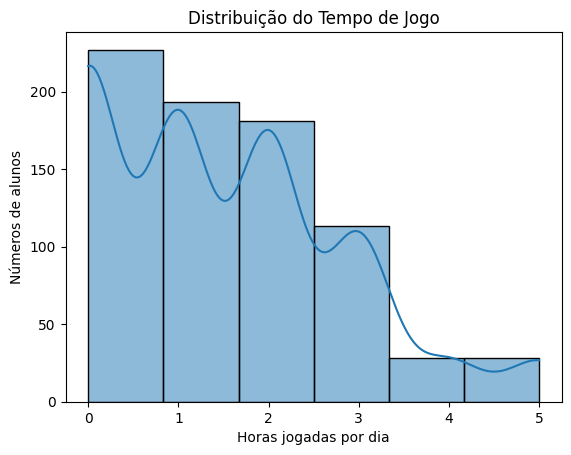

In [ ]:
sns.histplot(df["Playing Hours"], bins=6, kde=True)
plt.title("Distribuição do Tempo de Jogo")
plt.xlabel("Horas jogadas por dia")
plt.ylabel("Números de alunos")
plt.show()

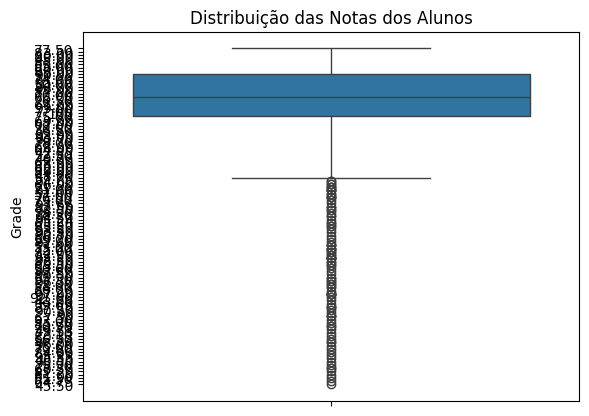

In [ ]:
sns.boxplot(df["Grade"])
plt.title("Distribuição das Notas dos Alunos")
plt.show()

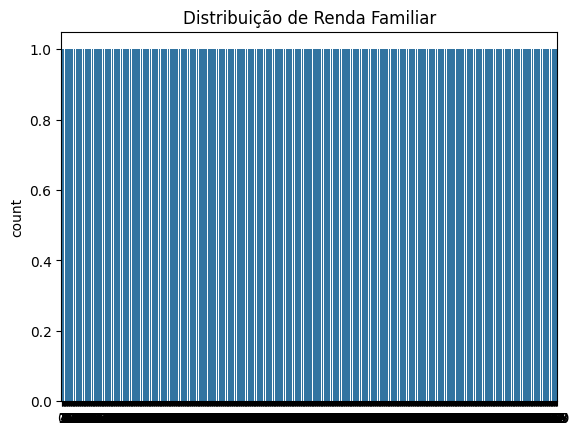

In [ ]:
sns.countplot(df["Parent Revenue"])
plt.title("Distribuição de Renda Familiar")
plt.show()

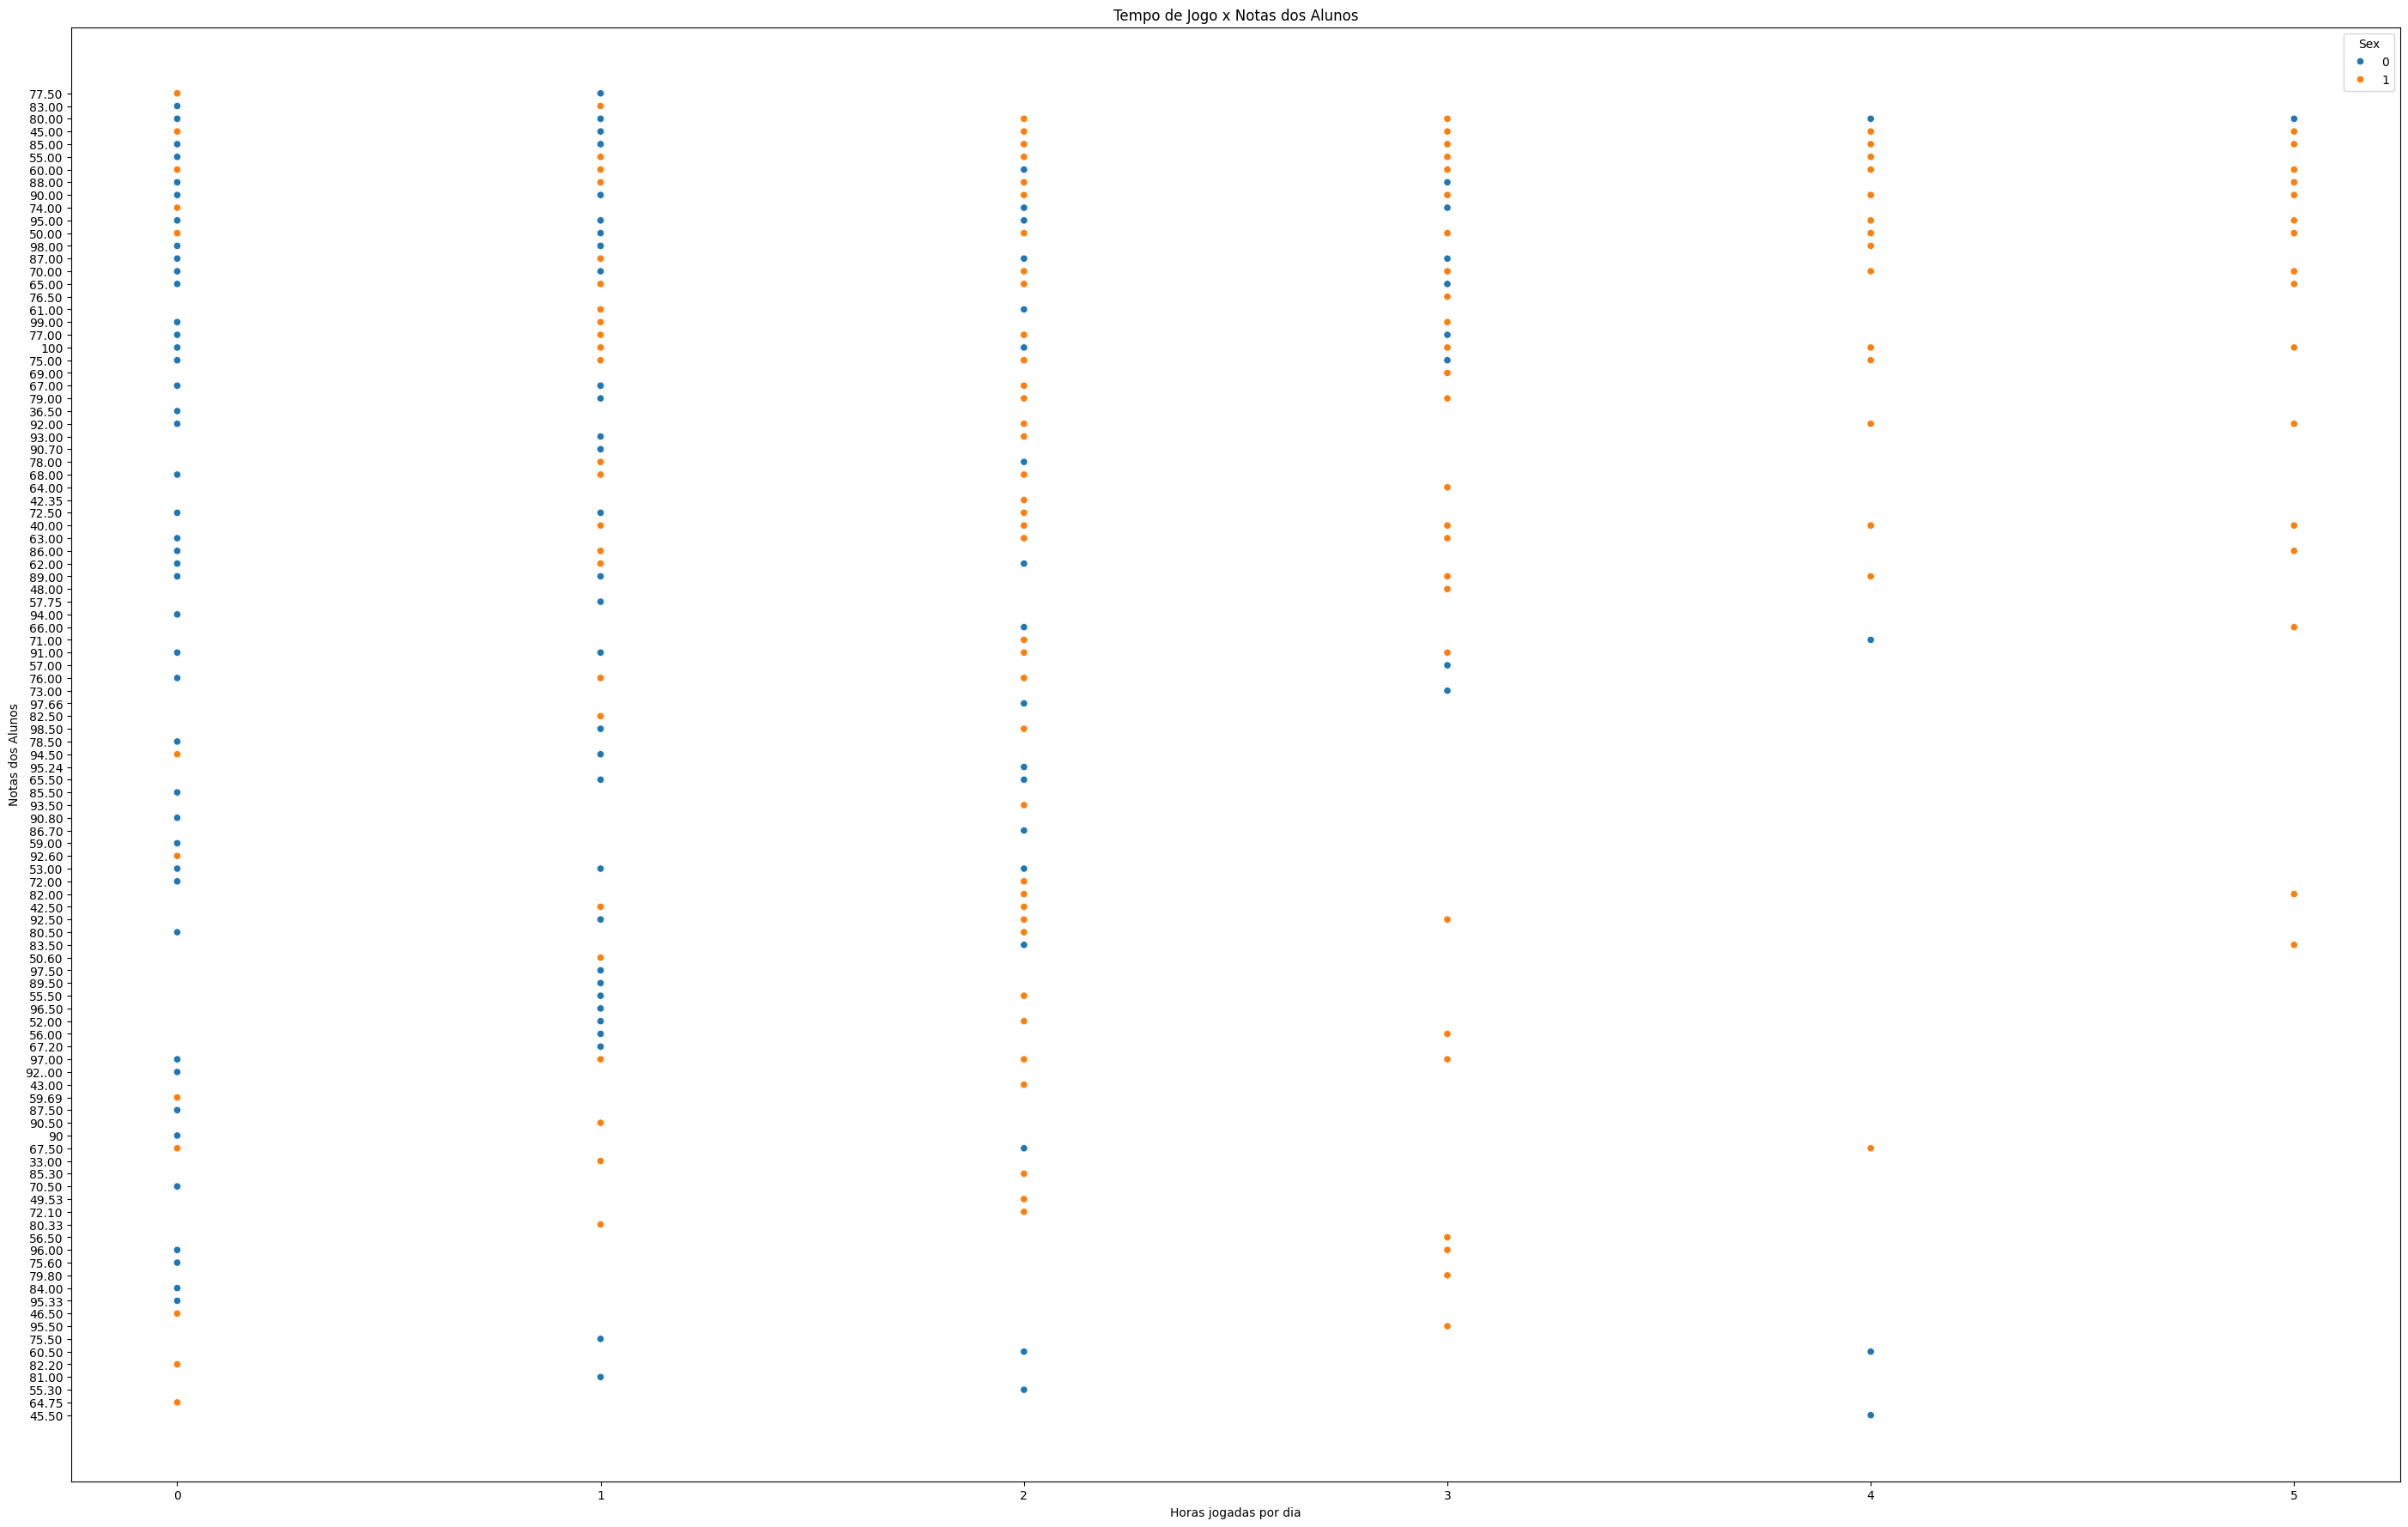

In [ ]:
plt.figure(figsize=(35, 22))
sns.scatterplot(data=df, x="Playing Hours", y="Grade", hue="Sex")
plt.title("Tempo de Jogo x Notas dos Alunos")
plt.xlabel("Horas jogadas por dia")
plt.ylabel("Notas dos Alunos")
plt.show()

In [ ]:
df["Grade Group"] = pd.cut(df["Grade"], bins=[0, 20, 40, 60, 80, 100], labels=["0-20", "21-40", "41-60", "61-80", "81-100"])
print(df[["Grade", "Grade Group"]].head())

TypeError: '<' not supported between instances of 'int' and 'str'

In [ ]:
df['Grade'] = pd.to_numeric(df['Grade'], errors='coerce')

df["Grade Group"] = pd.cut(df["Grade"], bins=[0, 20, 40, 60, 80, 100], labels=["0-20", "21-40", "41-60", "61-80", "81-100"])
print(df[["Grade", "Grade Group"]].head())

   Grade Grade Group
0   77.5       61-80
1   83.0      81-100
2   80.0       61-80
3   45.0       41-60
4   85.0      81-100


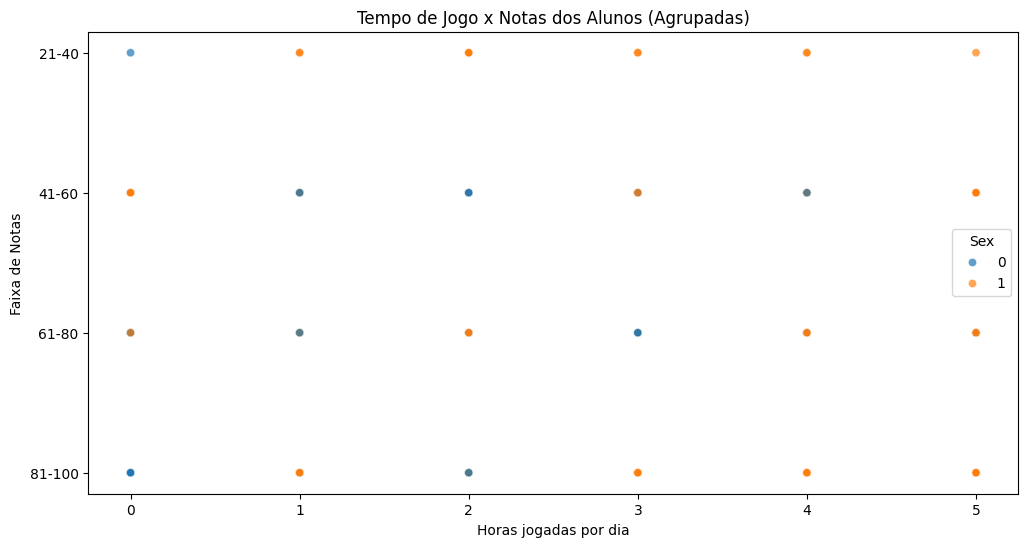

In [ ]:
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x="Playing Hours", y="Grade Group", hue="Sex", alpha=0.7)
plt.title("Tempo de Jogo x Notas dos Alunos (Agrupadas)")
plt.xlabel("Horas jogadas por dia")
plt.ylabel("Faixa de Notas")
plt.show()

In [ ]:
correlacao = df["Playing Hours"].corr(df["Grade"])
print(f"Correlação entre horas de jogo e notas: {correlacao}")


Correlação entre horas de jogo e notas: -0.15763449856184872


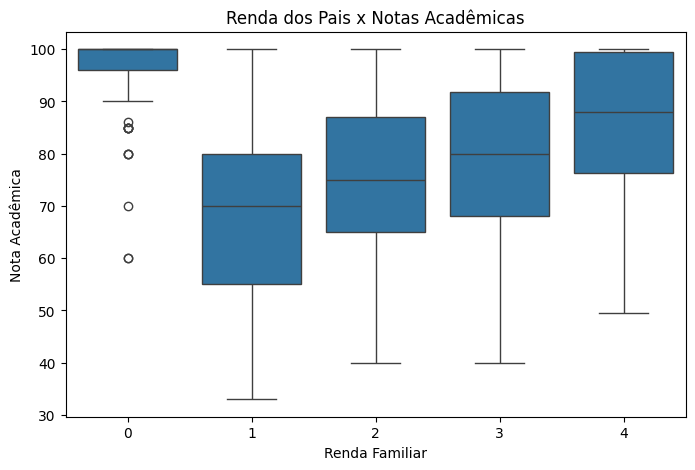

In [ ]:
plt.figure(figsize=(8,5))
sns.boxplot(data=df, x="Parent Revenue", y="Grade")
plt.title("Renda dos Pais x Notas Acadêmicas")
plt.xlabel("Renda Familiar")
plt.ylabel("Nota Acadêmica")
plt.show()

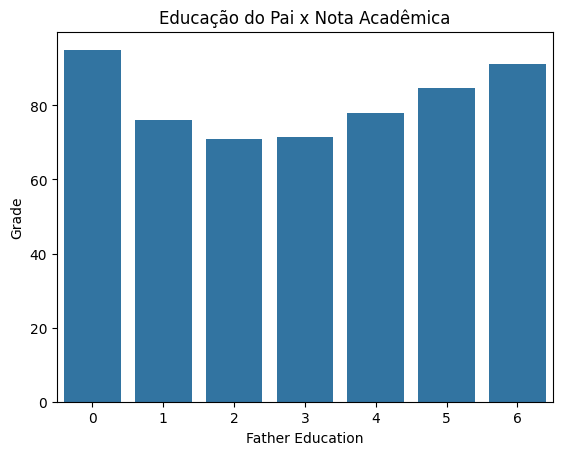

In [ ]:
sns.barplot(data=df, x="Father Education", y="Grade", errorbar=None)
plt.title("Educação do Pai x Nota Acadêmica")
plt.show()

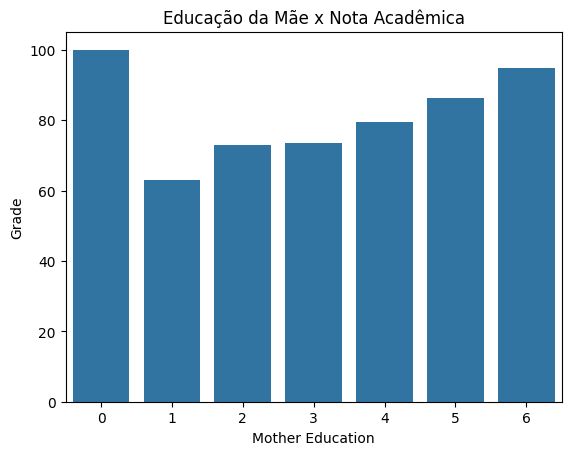

In [ ]:
sns.barplot(data=df, x="Mother Education", y="Grade", errorbar=None)
plt.title("Educação da Mãe x Nota Acadêmica")
plt.show()

In [ ]:
contagem_renda = df["Parent Revenue"].value_counts().reset_index()
contagem_renda.columns = ["Renda Familiar", "Número de Alunos"]
print("Distribuição de Renda Familiar:")
print(contagem_renda)

Distribuição de Renda Familiar:
   Renda Familiar  Número de Alunos
0               2               302
1               1               185
2               3               142
3               0                91
4               4                50


In [ ]:
estatisticas_notas = df["Grade"].describe().reset_index()
estatisticas_notas.columns = ["Estatística", "Valor"]
print("\nEstatísticas das Notas dos Alunos:")
print(estatisticas_notas)

# Adicionando quartis manualmente (já que describe() não os mostra em linhas separadas)
quartis = df["Grade"].quantile([0.25, 0.5, 0.75]).reset_index()
quartis.columns = ["Quartil", "Valor"]
print("\nQuartis das Notas dos Alunos:")
print(quartis)


Estatísticas das Notas dos Alunos:
  Estatística       Valor
0       count  769.000000
1        mean   77.500039
2         std   16.513588
3         min   33.000000
4         25%   65.000000
5         50%   80.000000
6         75%   90.000000
7         max  100.000000

Quartis das Notas dos Alunos:
   Quartil  Valor
0     0.25   65.0
1     0.50   80.0
2     0.75   90.0


In [ ]:
media_notas_jogo = df.groupby(["Playing Hours", "Sex"])["Grade"].mean().reset_index()
media_notas_jogo.columns = ["Horas de Jogo", "Sexo", "Média das Notas"]
print("\nTempo de Jogo x Notas dos Alunos:")
print(media_notas_jogo)


Tempo de Jogo x Notas dos Alunos:
    Horas de Jogo  Sexo  Média das Notas
0               0     0        82.822139
1               0     1        77.032830
2               1     0        77.539151
3               1     1        77.321034
4               2     0        77.561972
5               2     1        73.720727
6               3     0        76.533333
7               3     1        75.473494
8               4     0        64.250000
9               4     1        74.229167
10              5     0        80.000000
11              5     1        72.055556


In [ ]:
media_notas_agrupadas = df.groupby(["Playing Hours", "Sex"])["Grade Group"].value_counts().unstack().reset_index().fillna(0)
print("\nTempo de Jogo x Notas dos Alunos (Agrupadas):")
print(media_notas_agrupadas)


Tempo de Jogo x Notas dos Alunos (Agrupadas):
Grade Group  Playing Hours  Sex  0-20  21-40  41-60  61-80  81-100
0                        0    0     0      1     15     56     101
1                        0    1     0      0     12     20      21
2                        1    0     0      0     19     41      46
3                        1    1     0      2     14     35      36
4                        2    0     0      0     13     27      31
5                        2    1     0      4     25     38      43
6                        3    0     0      0      4     17       9
7                        3    1     0      2     18     31      32
8                        4    0     0      0      1      3       0
9                        4    1     0      2      7      4      11
10                       5    0     0      0      0      1       0
11                       5    1     0      1      7      9      10


In [ ]:
estatisticas_notas_renda = df.groupby("Parent Revenue")["Grade"].describe()
print("\nRenda dos Pais x Notas Acadêmicas:")
print(estatisticas_notas_renda)


Renda dos Pais x Notas Acadêmicas:
                count       mean        std    min     25%    50%     75%  \
Parent Revenue                                                              
0                91.0  95.972527   8.201071  60.00  96.000  100.0  100.00   
1               185.0  68.808541  15.515378  33.00  55.000   70.0   80.00   
2               301.0  75.239734  14.788600  40.00  65.000   75.0   87.00   
3               142.0  78.895070  15.727382  40.00  68.000   80.0   91.75   
4                50.0  85.683800  13.099320  49.53  76.375   88.0   99.50   

                  max  
Parent Revenue         
0               100.0  
1               100.0  
2               100.0  
3               100.0  
4               100.0  


In [ ]:
media_notas_pai = df.groupby("Father Education")["Grade"].mean().reset_index()
media_notas_pai.columns = ["Educação do Pai", "Média das Notas"]
print("\nEducação do Pai x Nota Acadêmica:")
print(media_notas_pai)


Educação do Pai x Nota Acadêmica:
   Educação do Pai  Média das Notas
0                0        95.000000
1                1        76.083333
2                2        70.817236
3                3        71.463371
4                4        78.034023
5                5        84.654575
6                6        91.159091


In [ ]:
media_notas_mae = df.groupby("Mother Education")["Grade"].mean().reset_index()
media_notas_mae.columns = ["Educação da Mãe", "Média das Notas"]
print("\nEducação da Mãe x Nota Acadêmica:")
print(media_notas_mae)


Educação da Mãe x Nota Acadêmica:
   Educação da Mãe  Média das Notas
0                0       100.000000
1                1        63.097407
2                2        72.899939
3                3        73.547387
4                4        79.561557
5                5        86.348679
6                6        94.944444


In [ ]:
intervalos = np.linspace(df["Playing Hours"].min(), df["Playing Hours"].max(), 7)  # 6 intervalos
contagem_alunos, limites_intervalos = np.histogram(df["Playing Hours"], bins=intervalos)

tabela_distribuicao_jogo = pd.DataFrame({
    "Intervalo de Horas": [f"{limites_intervalos[i]:.2f} - {limites_intervalos[i+1]:.2f}" for i in range(6)],
    "Número de Alunos": contagem_alunos
})

print("\nDistribuição do Tempo de Jogo:")
print(tabela_distribuicao_jogo)

NameError: name 'np' is not defined

In [ ]:
import numpy as np

intervalos = np.linspace(df["Playing Hours"].min(), df["Playing Hours"].max(), 7)  # 6 intervalos
contagem_alunos, limites_intervalos = np.histogram(df["Playing Hours"], bins=intervalos)

tabela_distribuicao_jogo = pd.DataFrame({
    "Intervalo de Horas": [f"{limites_intervalos[i]:.2f} - {limites_intervalos[i+1]:.2f}" for i in range(6)],
    "Número de Alunos": contagem_alunos
})

print("\nDistribuição do Tempo de Jogo:")
print(tabela_distribuicao_jogo)


Distribuição do Tempo de Jogo:
  Intervalo de Horas  Número de Alunos
0        0.00 - 0.83               227
1        0.83 - 1.67               193
2        1.67 - 2.50               181
3        2.50 - 3.33               113
4        3.33 - 4.17                28
5        4.17 - 5.00                28
